# Dataset available at kaggle

https://www.kaggle.com/jonathanoheix/face-expression-recognition-dataset


Install libraries, packages and dataset

In [ ]:
!git clone https://github.com/parth1620/Facial-Expression-Dataset.git
!pip install -U git+https://github.com/albumentations-team/albumentations
!pip install timm
!pip install --upgrade opencv-contrib-python

Cloning into 'Facial-Expression-Dataset'...
remote: Enumerating objects: 34052, done.
remote: Total 34052 (delta 0), reused 0 (delta 0), pack-reused 34052 (from 1)
Receiving objects: 100% (34052/34052), 52.31 MiB | 46.54 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (35887/35887), done.
  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-2ffrgqsb
  Running command git clone --filter=blob:none --quiet https://github.com/albumentations-team/albumentations /tmp/pip-req-build-2ffrgqsb
  Resolved https://github.com/albumentations-team/albumentations to commit 2a793a1df0931d4ecf4fb3e4f183905e429c7736
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.7/632.7 kB 13.1 MB/s eta 0:00:00
  Created wheel for albumentations: filename

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Configurations

In [ ]:
TRAIN_IMG_FOLDER_PATH = '/content/Facial-Expression-Dataset/train/'
VALID_IMG_FOLDER_PATH = '/content/Facial-Expression-Dataset/validation/'
#LEARNING RATE
LR=0.001
BATCH_SIZE=32
EPOCHS=15


DEVICE='cuda'
MODEL_NAME='efficientnet_b0'

# Load Dataset

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms as T

In [ ]:
train_augs=T.Compose([
    #T.composwe -----> It ensures that the output of one transformation is passed as input to the next.
    T.RandomHorizontalFlip(p=0.5), # randomly flips the image horizontally with .50% chance the image will be flipped. If the random number generated is less than 0.5, the image is flipped; otherwise, it remains unchanged.
    T.RandomRotation(degrees=(-20,+20)),#This transformation rotates the image by a random angle.
    T.ToTensor() #PIL(Python Imaging Library) / numpy array ---> torch tensor ->(image (h,w,channel)->(c,h,w)) , shift the position of channel

])
# We are using dynamic augmentation, which will not increase the data size
valid_augs=T.Compose([
    T.ToTensor()
])

In [ ]:
trainset=ImageFolder(TRAIN_IMG_FOLDER_PATH,transform=train_augs)
validset=ImageFolder(VALID_IMG_FOLDER_PATH,transform=valid_augs)

In [ ]:
print(f"Total no. of examples in trainset : {len(trainset)}")
print(f"Total no. of examples in validset : {len(validset)}")

Total no. of examples in trainset : 28821
Total no. of examples in validset : 7066


In [ ]:
print(trainset.class_to_idx)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


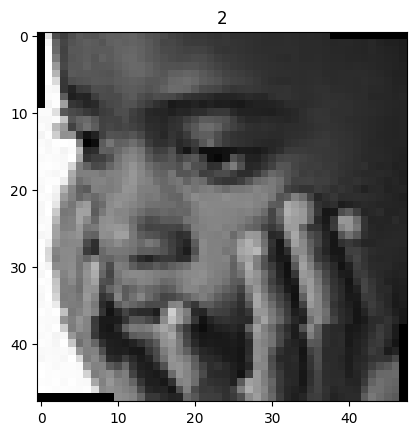

In [ ]:
image,label = trainset[8090]
plt.imshow(image.permute(1,2,0)) #(h,w,c)
plt.title(label)
plt.show()

# Load Dataset into Batches

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
trainloader = DataLoader(trainset , batch_size=BATCH_SIZE , shuffle=True)
validloader = DataLoader(validset,batch_size=BATCH_SIZE)

In [ ]:
print(f"Total no. of batches in trainloader : {len(trainloader)}")
print(f"Total no. of batches in validloader : {len(validloader)}")

Total no. of batches in trainloader : 901
Total no. of batches in validloader : 221


In [ ]:
for images,labels in trainloader:
  break;



print(f"One image batch shape : {images.shape}")#32,3,48,48-> no. of images in 1 batch, channel size , image size(48,48)
print(f"One label batch shape : {labels.shape}")

One image batch shape : torch.Size([32, 3, 48, 48])
One label batch shape : torch.Size([32])


# Create Model

In [ ]:
import timm
from torch import nn

In [ ]:
class FaceModel(nn.Module):
  def __init__(self):
    super(FaceModel , self).__init__()

    self.eff_net = timm.create_model('efficientnet_b0',pretrained=True,num_classes=7)

    #pretrained=True: Indicates that the model should be loaded with weights pre-trained on a dataset (commonly ImageNet)
    #num_classes=7: Sets the final layer to output 7 logits, representing 7 classes for classification (e.g., facial expression recognition)
    #output are logits without any softmax or sigmoid activation


  def forward(self , images , labels = None):
    logits=self.eff_net(images) # without any sigmoid , or softmax applied on it on the final layer

    if labels!=None:
      loss=nn.CrossEntropyLoss()(logits,labels)
      return logits , loss

    return logits


In [ ]:
model=FaceModel()
model.to(DEVICE)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


FaceModel(
  (eff_net): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (aa): Identity()
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv

# Create Train and Eval Function

In [ ]:
from tqdm import tqdm
#tqdm is a Python library used to display progress bars in loops

In [ ]:
def multiclass_accuracy(y_pred,y_true):
    top_p,top_class = y_pred.topk(1,dim = 1)
    equals = top_class == y_true.view(*top_class.shape)
    return torch.mean(equals.type(torch.FloatTensor))

In [ ]:
def train_fn(model,dataloader,optimizer,current_epo):
  model.train()
  total_loss=0
  total_acc=0
  tk=tqdm(dataloader , desc="EPOCH"+"[TRAIN]"+str(current_epo+1)+"/"+str(EPOCHS))
  #This line creates a progress bar using tqdm to track the progress of the training loop over the dataloader.


  for t,data in enumerate(tk):
    images,labels = data
    images ,labels =images.to(DEVICE),labels.to(DEVICE) #Transfer to GPU
    #images, labels = images.to(DEVICE), labels.to(DEVICE): Moves both the images and labels to the device specified by DEVICE (usually a GPU if available).

    optimizer.zero_grad()
    #PyTorch accumulates gradients by default.

    logits,loss = model(images,labels)
    loss.backward()
    #This updates the model's parameters based on the gradients computed during loss.backward().

    optimizer.step()

    total_loss+=loss.item()
    total_acc+=multiclass_accuracy(logits,labels)
    tk.set_postfix({'loss':'%6f' %float(total_loss / (t+1)),
                    'acc':'%6f' %float(total_acc / (t+1))})

  return total_loss/len(dataloader),total_acc/len(dataloader)



In [ ]:
def eval_fn(model,dataloader,current_epo):
  model.eval()
  total_loss=0
  total_acc=0
  tk=tqdm(dataloader , desc="EPOCH"+"[VALID]"+str(current_epo+1)+"/"+str(EPOCHS))

  for t,data in enumerate(tk):
    images,labels = data
    images ,labels =images.to(DEVICE),labels.to(DEVICE) #Transfer to GPU


    logits,loss = model(images,labels)


    total_loss+=loss.item()
    total_acc+=multiclass_accuracy(logits,labels)
    tk.set_postfix({'loss':'%6f' %float(total_loss / (t+1)),
                    'acc':'%6f' %float(total_acc / (t+1))})

  return total_loss/len(dataloader),total_acc/len(dataloader)



# Create Training Loop

In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr=LR)


In [ ]:
import numpy as np
best_valid_loss=np.Inf


for i in range(EPOCHS):
  train_loss,train_acc = train_fn(model,trainloader,optimizer,i) # i is curent EPOCH
  valid_loss,valid_acc = eval_fn(model,validloader,i)

  if valid_loss<best_valid_loss:
    best_valid_loss = valid_loss
    torch.save(model.state_dict(),"best-weights.pt")
    print("Saved Best wiights")
    best_valid_loss = valid_loss

EPOCH[VALID]1/15: 100%|██████████| 221/221 [00:07<00:00, 29.21it/s, loss=1.320128, acc=0.498967]


Saved Best wiights


EPOCH[VALID]2/15: 100%|██████████| 221/221 [00:06<00:00, 32.36it/s, loss=1.157562, acc=0.564969]


Saved Best wiights


EPOCH[VALID]3/15: 100%|██████████| 221/221 [00:06<00:00, 35.09it/s, loss=1.098372, acc=0.581796]


Saved Best wiights


EPOCH[VALID]4/15: 100%|██████████| 221/221 [00:07<00:00, 28.51it/s, loss=1.076064, acc=0.597383]


Saved Best wiights


EPOCH[VALID]5/15: 100%|██████████| 221/221 [00:07<00:00, 29.99it/s, loss=1.053899, acc=0.604105]


Saved Best wiights


EPOCH[VALID]8/15: 100%|██████████| 221/221 [00:06<00:00, 32.16it/s, loss=1.029316, acc=0.615265]


Saved Best wiights


EPOCH[VALID]9/15: 100%|██████████| 221/221 [00:07<00:00, 31.13it/s, loss=1.005466, acc=0.623727]


Saved Best wiights


EPOCH[VALID]10/15: 100%|██████████| 221/221 [00:06<00:00, 33.29it/s, loss=0.997132, acc=0.629753]


Saved Best wiights


EPOCH[VALID]11/15: 100%|██████████| 221/221 [00:06<00:00, 33.68it/s, loss=0.995683, acc=0.636976]


Saved Best wiights


EPOCH[VALID]12/15: 100%|██████████| 221/221 [00:07<00:00, 30.65it/s, loss=0.992111, acc=0.636541]


Saved Best wiights


EPOCH[VALID]13/15: 100%|██████████| 221/221 [00:06<00:00, 36.14it/s, loss=0.978495, acc=0.645123]


Saved Best wiights


EPOCH[VALID]15/15: 100%|██████████| 221/221 [00:06<00:00, 34.81it/s, loss=1.003970, acc=0.639619]


In [ ]:
#Model's Prediction: The model generates predictions (logits or probabilities).
#Loss Calculation: The predicted values are compared to the true values using the loss function.
#Loss Feedback: The loss is used to compute the gradients, which tell us how to adjust the weights to improve the model’s predictions.
# Parameter Update: The optimizer uses the gradients to update the model’s parameters (weights and biases) to minimize the loss.

# Inference

In [ ]:
import torch
from torchvision import transforms as T
from PIL import Image


model = FaceModel()
model.load_state_dict(torch.load('/content/best-weights.pt'))
model.eval()
model.to(DEVICE)


inference_transforms = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
])

def predict_image(image_path):
    # image = Image.open('/content/happy.jpg')
    # image = Image.open('/content/happy.jpg')
    image = Image.open('/content/sad.jpg')
    image = inference_transforms(image).unsqueeze(0).to(DEVICE)

    with torch.no_grad():
        logits = model(image)
        probabilities = torch.nn.functional.softmax(logits, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()


    class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    predicted_class_name = class_names[predicted_class]

    return predicted_class_name, probabilities


image_path = 'img_path'
predicted_label, probabilities = predict_image(image_path)


<ipython-input-44-ade1cbfb1c04>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/best-weights.pt'))


In [ ]:
print(f"Predicted Class: {predicted_label}")
print(f"Probabilities: {probabilities}")

Predicted Class: Neutral
Probabilities: tensor([[0.0579, 0.0437, 0.1361, 0.1975, 0.0788, 0.0541, 0.4320]],
       device='cuda:0')
